<a href="https://colab.research.google.com/github/LatifaAbdulwahab/cloud/blob/main/Titanic_ML_KaggleCompetition%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries and data set**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('train.csv')

In [3]:
print(titanic_data.head(88)) #display the first few rows of the titanic_data


    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
83           84         0       1   
84           85         1       2   
85           86         1       3   
86           87         0       3   
87           88         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                                ...     ...   ...    ...   
83       

In [4]:
print(titanic_data.describe()) #used to display a summary of descriptive statistics, It provides information such as count, mean, standard deviation, minimum, quartiles, and maximum values for each column in the DataFrame.


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Find Correlation**

<Axes: >

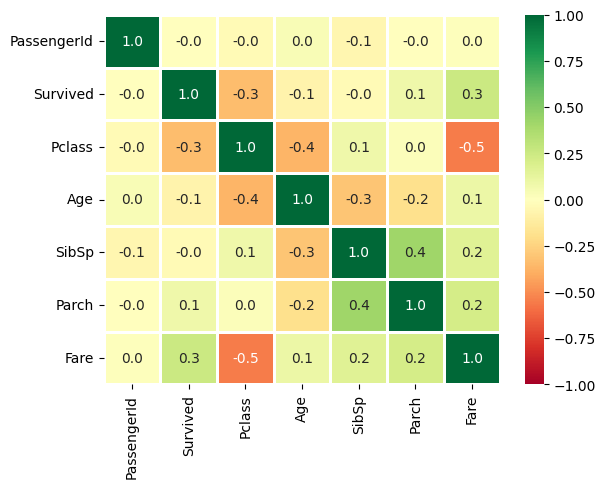

In [8]:
# Select numeric columns and create correlation heatmap
numeric_columns = titanic_data.select_dtypes(include=np.number)
sns.heatmap(numeric_columns.corr(), cmap="RdYlGn", annot=True,fmt=".1f",linewidth=1,vmin=-1,vmax=1)

In [9]:
#StratifiedShuffleSplit is used for creating train/test splits while maintaining the class distribution of the target variable.
from sklearn.model_selection import StratifiedShuffleSplit

#split is an instance of StratifiedShuffleSplit. n_splits=1: Specifies that we want to create only one train/test split.
#test_size=0.2: Indicates that 20% of the data will be used for testing
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
#generate train/test indices based on the specified columns ("Survived", "Pclass", and "Sex") from the titanic_data
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

    print(strat_test_set)

     PassengerId  Survived  Pclass  \
587          588         1       1   
50            51         0       3   
252          253         0       1   
74            75         1       3   
563          564         0       3   
..           ...       ...     ...   
49            50         0       3   
124          125         0       1   
355          356         0       3   
796          797         1       1   
777          778         1       3   

                                              Name     Sex   Age  SibSp  \
587               Frolicher-Stehli, Mr. Maxmillian    male  60.0      1   
50                      Panula, Master. Juha Niilo    male   7.0      4   
252                      Stead, Mr. William Thomas    male  62.0      0   
74                                   Bing, Mr. Lee    male  32.0      0   
563                              Simmons, Mr. John    male   NaN      0   
..                                             ...     ...   ...    ...   
49   Arnold-Franch

visualizes the distribution of the 'Survived' and 'Pclass' columns in both the training and testing sets using histograms. The first subplot shows the histograms for the training set, while the second subplot shows the histograms for the testing set, with different colors for clarity.


<Axes: >

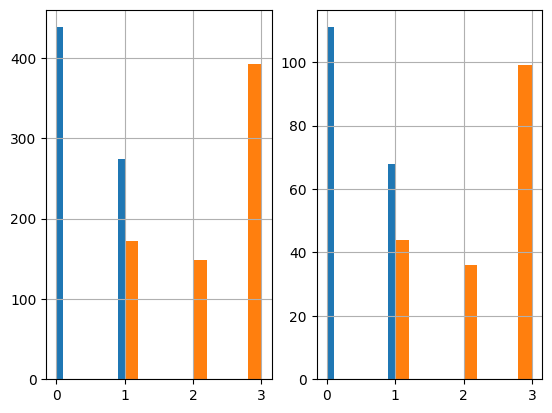

In [13]:
#Left
plt.subplot(1,2,1)
strat_train_set['Survived'].hist() #Blue color
strat_train_set['Pclass'].hist() #Orange color

#Right
plt.subplot(1,2,2)
strat_test_set['Survived'].hist() #Blue color
strat_test_set['Pclass'].hist() #Orange color


In [14]:
print(strat_train_set.info()) #to see if there are missing value on new train split


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 204 to 338
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB
None


In [15]:
print(strat_test_set.info()) #to see if there are missing value on new test split


<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 587 to 777
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          142 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        43 non-null     object 
 11  Embarked     178 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB
None


In [65]:
#transform and fill null data
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
#BaseEstimator: Base class for all estimators in scikit-learn. It provides default implementations for get_params() and set_params() methods.
#TransformerMixin: Mixin class for transformers in scikit-learn. It provides default implementations for fit_transform() method.

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # For transformers, the AgeImputer method does nothing but return self
        return self

    def transform(self, X):
        # Create a SimpleImputer object with the mean strategy
        imputer = SimpleImputer(strategy="mean")

        # Use fit_transform on the 'Age' column to impute missing values with the mean
        # This modifies the 'Age' column in place and replaces missing values with the mean
        X['Age'] = imputer.fit_transform(X[['Age']])

        # Return the modified DataFrame with imputed 'Age' column
        return X


In [70]:
#seperate some previous columns to create new columns
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()

        # Encode 'Embarked' => to be 3 columns
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C","S","Q","N"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        # Encode 'Sex' => to be 2 columns
        sex_df = pd.DataFrame(X['Sex'])  # Reshape 'Sex' to a DataFrame with a single column
        matrix = encoder.fit_transform(sex_df).toarray()
        column_names = ["Female","Male"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

   # Calculate family size based on 'SibSp' and 'Parch' columns
        for index, row in X.iterrows():
             X.at[index, 'FamilySize'] = row['SibSp'] + row['Parch'] + 1  # Adding 1 for the person itself

        return X



In [71]:
#drop some features that are not important
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N","SibSp","Parch"], axis=1, errors="ignore" )
#drop all original columns before encode
# N here is column add when encode Embarked (N is column represent null values in Embarked)



In [72]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])


In [82]:

strat_train_set = pipeline.fit_transform(strat_train_set)
strat_train_set.drop(["Embarked","Name","Ticket","Cabin","Sex","N","SibSp","Parch"], axis=1, errors="ignore" )
print(strat_train_set)
print(strat_train_set.info()) #now there is no null value


     PassengerId  Survived  Pclass        Age      Fare    C    S    Q  \
204          205         1       3  18.000000    8.0500  0.0  0.0  1.0   
398          399         0       2  23.000000   10.5000  0.0  0.0  1.0   
570          571         1       2  62.000000   10.5000  0.0  0.0  1.0   
27            28         0       1  19.000000  263.0000  0.0  0.0  1.0   
177          178         0       1  50.000000   28.7125  1.0  0.0  0.0   
..           ...       ...     ...        ...       ...  ...  ...  ...   
630          631         1       1  80.000000   30.0000  0.0  0.0  1.0   
375          376         1       1  29.868601   82.1708  1.0  0.0  0.0   
220          221         1       3  16.000000    8.0500  0.0  0.0  1.0   
186          187         1       3  29.868601   15.5000  0.0  1.0  0.0   
338          339         1       3  45.000000    8.0500  0.0  0.0  1.0   

     Female  Male  FamilySize  
204     0.0   1.0         1.0  
398     0.0   1.0         1.0  
570     0.0   1

In [83]:
print(strat_train_set.describe())

       PassengerId    Survived      Pclass         Age        Fare  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    437.967697    0.384831    2.308989   29.868601   32.101047   
std     256.852840    0.486897    0.835249   12.718789   50.372852   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     211.750000    0.000000    2.000000   22.000000    7.925000   
50%     443.500000    0.000000    3.000000   29.868601   14.427100   
75%     653.250000    1.000000    3.000000   35.000000   31.000000   
max     890.000000    1.000000    3.000000   80.000000  512.329200   

                C           S           Q      Female        Male  FamilySize  
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000  
mean     0.193820    0.082865    0.721910    0.351124    0.648876    1.905899  
std      0.395568    0.275872    0.448373    0.477657    0.477657    1.644449  
min      0.000000    0.000000    0.000000    0.00

In [84]:
from sklearn.preprocessing import StandardScaler
#x, y are new data after change the columns
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']
#mean of each feature is subtracted and then divided by the standard deviation.
#This process ensures that the features have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
#This method fits the scaler to the data (X), computing the mean and standard deviation of each feature.
X_data = scaler.fit_transform(X)
#convert y to a NumPy array format, making it compatible with scikit-learn's algorithms.
y_data = y.to_numpy()


In [92]:
#training
#also DecisionTreeClassifier work
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #to validate (cross validation)

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)
#print(grid_search.fit(X_data, y_data))

final_clf = grid_search.best_estimator_
#print(final_clf)

X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set["Survived"]

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

final_clf.score(X_data_test, y_data_test)

print(final_clf.score(X_data_test, y_data_test)) #the number of accuracy

final_data = pipeline.fit_transform(titanic_data)
print(final_data)

X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

#production classifier
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

print(grid_search.fit(X_data_final, y_data_final))

prod_final_clf = grid_search.best_estimator_
print(prod_final_clf)

titanic_test_data = pd.read_csv("test.csv")
print(titanic_test_data)

final_test_data = pipeline.fit_transform(titanic_test_data)
print(final_test_data)

#handle with null value in test data file
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

predictions = prod_final_clf.predict(X_data_final_test)
print(predictions)

#data frame
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions1.csv", index=False)

print(final_df)


0.8581460674157303
     PassengerId  Survived  Pclass        Age     Fare    C    S    Q  Female  \
0              1         0       3  22.000000   7.2500  0.0  0.0  1.0     0.0   
1              2         1       1  38.000000  71.2833  1.0  0.0  0.0     1.0   
2              3         1       3  26.000000   7.9250  0.0  0.0  1.0     1.0   
3              4         1       1  35.000000  53.1000  0.0  0.0  1.0     1.0   
4              5         0       3  35.000000   8.0500  0.0  0.0  1.0     0.0   
..           ...       ...     ...        ...      ...  ...  ...  ...     ...   
886          887         0       2  27.000000  13.0000  0.0  0.0  1.0     0.0   
887          888         1       1  19.000000  30.0000  0.0  0.0  1.0     1.0   
888          889         0       3  29.699118  23.4500  0.0  0.0  1.0     1.0   
889          890         1       1  26.000000  30.0000  1.0  0.0  0.0     0.0   
890          891         0       3  32.000000   7.7500  0.0  1.0  0.0     0.0   

     Mal

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the classifier
clf = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = [
    {"max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

# Perform grid search cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

# Get the best estimator from grid search
final_clf = grid_search.best_estimator_

# Transform the test set using the pipeline
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set["Survived"]

# Scale the test data
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

# Get the accuracy of the final classifier on the test data
print(final_clf.score(X_data_test, y_data_test))  # the accuracy score

# Transform and scale the entire dataset for final training
final_data = pipeline.fit_transform(titanic_data)
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

# Perform grid search cross-validation for the production classifier
prod_clf = DecisionTreeClassifier()  # Use DecisionTreeClassifier for production

param_grid = [
    {"max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

# Get the best estimator from grid search for production
prod_final_clf = grid_search.best_estimator_

# Load the test data
titanic_test_data = pd.read_csv("test.csv")

# Transform and scale the test data using the pipeline
final_test_data = pipeline.fit_transform(titanic_test_data)
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

# Make predictions using the production classifier
predictions = prod_final_clf.predict(X_data_final_test)

# Create a DataFrame with predictions and save it to a CSV file
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions2.csv", index=False)

print(final_df)


0.8595505617977528
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
